# Classification Example Using Iris Dataset

## 1. Prepare & Explore Dataset

In [5]:
import numpy as np
import pandas as pd

In [7]:
#read the dataset
iris_data = pd.read_csv('iris_data.csv')

In [11]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
iris_data.shape

(150, 5)

In [13]:
#split the dataset into train and test
train_data = iris_data.sample(frac=0.8, random_state=0)
test_data = iris_data.drop(train_data.index)

In [14]:
train_data

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,2
62,6.0,2.2,4.0,1.0,1
33,5.5,4.2,1.4,0.2,0
107,7.3,2.9,6.3,1.8,2
7,5.0,3.4,1.5,0.2,0
...,...,...,...,...,...
57,4.9,2.4,3.3,1.0,1
131,7.9,3.8,6.4,2.0,2
65,6.7,3.1,4.4,1.4,1
32,5.2,4.1,1.5,0.1,0


In [16]:
test_data

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,0
14,5.8,4.0,1.2,0.2,0
19,5.1,3.8,1.5,0.3,0
21,5.1,3.7,1.5,0.4,0
25,5.0,3.0,1.6,0.2,0
29,4.7,3.2,1.6,0.2,0
36,5.5,3.5,1.3,0.2,0
39,5.1,3.4,1.5,0.2,0
47,4.6,3.2,1.4,0.2,0
49,5.0,3.3,1.4,0.2,0


In [17]:
#split train and test data into predictors and target
train_predictors = train_data[train_data.columns [train_data.columns  != 'species']]
train_target = train_data['species']

test_predictors = test_data[test_data.columns [test_data.columns  != 'species']]
test_target = test_data['species']

In [18]:
train_predictors

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
...,...,...,...,...
57,4.9,2.4,3.3,1.0
131,7.9,3.8,6.4,2.0
65,6.7,3.1,4.4,1.4
32,5.2,4.1,1.5,0.1


In [19]:
train_target

114    2
62     1
33     0
107    2
7      0
      ..
57     1
131    2
65     1
32     0
138    2
Name: species, Length: 120, dtype: int64

In [20]:
test_predictors

,sepal_length,sepal_width,petal_length,petal_width
9,4.9,3.1,1.5,0.1
14,5.8,4.0,1.2,0.2
19,5.1,3.8,1.5,0.3
21,5.1,3.7,1.5,0.4
25,5.0,3.0,1.6,0.2
29,4.7,3.2,1.6,0.2
36,5.5,3.5,1.3,0.2
39,5.1,3.4,1.5,0.2
47,4.6,3.2,1.4,0.2
49,5.0,3.3,1.4,0.2


In [21]:
test_target

9      0
14     0
19     0
21     0
25     0
29     0
36     0
39     0
47     0
49     0
58     1
67     1
70     1
72     1
77     1
79     1
81     1
82     1
87     1
88     1
99     1
103    2
115    2
117    2
122    2
130    2
136    2
140    2
142    2
145    2
Name: species, dtype: int64

## 2. Define the neural network architecture

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [24]:
train_target = to_categorical(train_target)
test_target = to_categorical(test_target)

n = train_predictors.shape[1]

model = keras.Sequential()
model.add(layers.Dense(5, activation='relu', input_shape = (n,)  ))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

## 3. Compile the neural net

In [27]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', 'mse']
)

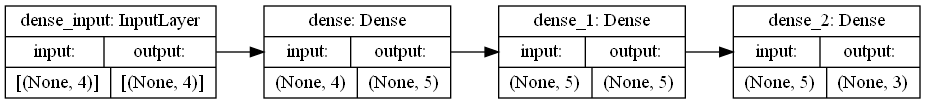

In [28]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

## 4. Fit / train the neural net

In [33]:
model.fit(train_predictors, train_target, epochs = 500)

Epoch 1/500
4/4 [==============================] - 0s 998us/step - loss: 0.9550 - accuracy: 0.6750 - mse: 0.1876
Epoch 2/500
4/4 [==============================] - 0s 665us/step - loss: 0.9507 - accuracy: 0.6750 - mse: 0.1866
Epoch 3/500
4/4 [==============================] - 0s 665us/step - loss: 0.9464 - accuracy: 0.6750 - mse: 0.1855
Epoch 4/500
4/4 [==============================] - 0s 998us/step - loss: 0.9417 - accuracy: 0.6750 - mse: 0.1844
Epoch 5/500
4/4 [==============================] - 0s 665us/step - loss: 0.9376 - accuracy: 0.6750 - mse: 0.1834
Epoch 6/500
4/4 [==============================] - 0s 665us/step - loss: 0.9329 - accuracy: 0.6750 - mse: 0.1822
Epoch 7/500
4/4 [==============================] - 0s 665us/step - loss: 0.9283 - accuracy: 0.6750 - mse: 0.1811
Epoch 8/500
4/4 [==============================] - 0s 998us/step - loss: 0.9238 - accuracy: 0.6750 - mse: 0.1800
Epoch 9/500
4/4 [==============================] - 0s 665us/step - loss: 0.9194 - accuracy: 0.67

Epoch 73/500
4/4 [==============================] - 0s 997us/step - loss: 0.6859 - accuracy: 0.6750 - mse: 0.1323
Epoch 74/500
4/4 [==============================] - 0s 997us/step - loss: 0.6837 - accuracy: 0.6750 - mse: 0.1319
Epoch 75/500
4/4 [==============================] - 0s 997us/step - loss: 0.6816 - accuracy: 0.6750 - mse: 0.1316
Epoch 76/500
4/4 [==============================] - 0s 665us/step - loss: 0.6795 - accuracy: 0.6750 - mse: 0.1313
Epoch 77/500
4/4 [==============================] - 0s 998us/step - loss: 0.6775 - accuracy: 0.6750 - mse: 0.1310
Epoch 78/500
4/4 [==============================] - 0s 997us/step - loss: 0.6756 - accuracy: 0.6750 - mse: 0.1307
Epoch 79/500
4/4 [==============================] - 0s 665us/step - loss: 0.6736 - accuracy: 0.6750 - mse: 0.1304
Epoch 80/500
4/4 [==============================] - 0s 665us/step - loss: 0.6717 - accuracy: 0.6750 - mse: 0.1301
Epoch 81/500
4/4 [==============================] - 0s 998us/step - loss: 0.6697 - accur

4/4 [==============================] - 0s 665us/step - loss: 0.5497 - accuracy: 0.6917 - mse: 0.1151
Epoch 216/500
4/4 [==============================] - 0s 664us/step - loss: 0.5493 - accuracy: 0.6917 - mse: 0.1151
Epoch 217/500
4/4 [==============================] - 0s 665us/step - loss: 0.5489 - accuracy: 0.6917 - mse: 0.1150
Epoch 218/500
4/4 [==============================] - 0s 665us/step - loss: 0.5484 - accuracy: 0.6917 - mse: 0.1150
Epoch 219/500
4/4 [==============================] - 0s 998us/step - loss: 0.5480 - accuracy: 0.6917 - mse: 0.1149
Epoch 220/500
4/4 [==============================] - 0s 998us/step - loss: 0.5476 - accuracy: 0.6917 - mse: 0.1149
Epoch 221/500
4/4 [==============================] - 0s 665us/step - loss: 0.5472 - accuracy: 0.6917 - mse: 0.1148
Epoch 222/500
4/4 [==============================] - 0s 665us/step - loss: 0.5468 - accuracy: 0.6917 - mse: 0.1148
Epoch 223/500
4/4 [==============================] - 0s 665us/step - loss: 0.5464 - accuracy: 

4/4 [==============================] - 0s 997us/step - loss: 0.4659 - accuracy: 0.9750 - mse: 0.0933
Epoch 358/500
4/4 [==============================] - 0s 665us/step - loss: 0.4645 - accuracy: 0.9750 - mse: 0.0930
Epoch 359/500
4/4 [==============================] - 0s 664us/step - loss: 0.4633 - accuracy: 0.9750 - mse: 0.0926
Epoch 360/500
4/4 [==============================] - 0s 997us/step - loss: 0.4621 - accuracy: 0.9750 - mse: 0.0922
Epoch 361/500
4/4 [==============================] - 0s 665us/step - loss: 0.4609 - accuracy: 0.9750 - mse: 0.0919
Epoch 362/500
4/4 [==============================] - 0s 998us/step - loss: 0.4597 - accuracy: 0.9750 - mse: 0.0916
Epoch 363/500
4/4 [==============================] - 0s 665us/step - loss: 0.4584 - accuracy: 0.9750 - mse: 0.0912
Epoch 364/500
4/4 [==============================] - 0s 665us/step - loss: 0.4571 - accuracy: 0.9750 - mse: 0.0909
Epoch 365/500
4/4 [==============================] - 0s 665us/step - loss: 0.4560 - accuracy: 

4/4 [==============================] - 0s 665us/step - loss: 0.3081 - accuracy: 0.9833 - mse: 0.0511
Epoch 500/500
4/4 [==============================] - 0s 665us/step - loss: 0.3072 - accuracy: 0.9833 - mse: 0.0509


## 5. Evaluate the neural net

In [34]:
result = model.evaluate(test_predictors, test_target, verbose=0)
dict(zip(model.metrics_names, result))

{'loss': 0.32942456007003784,
 'accuracy': 0.9333333373069763,
 'mse': 0.05889347568154335}

## 6. Make predictions / classifications for unseen data

In [35]:
#not yet until we enhanced the results
predictions = model.predict(test_predictors)
predictions

array([[9.55777764e-01, 4.42221612e-02, 1.50082755e-07],
       [9.92598891e-01, 7.40105845e-03, 2.36261066e-10],
       [9.81547713e-01, 1.84522867e-02, 6.97093538e-09],
       [9.76115048e-01, 2.38848701e-02, 1.71564274e-08],
       [9.39242959e-01, 6.07565977e-02, 4.66694530e-07],
       [9.49310422e-01, 5.06893098e-02, 2.43942111e-07],
       [9.81958807e-01, 1.80411879e-02, 6.44480558e-09],
       [9.70251381e-01, 2.97486130e-02, 3.70304392e-08],
       [9.57280278e-01, 4.27195579e-02, 1.32757407e-07],
       [9.67882514e-01, 3.21174525e-02, 4.84762452e-08],
       [1.90118507e-01, 7.05148757e-01, 1.04732804e-01],
       [2.50517488e-01, 6.97890818e-01, 5.15917055e-02],
       [8.50227177e-02, 5.65734386e-01, 3.49242836e-01],
       [2.87904628e-02, 3.15321416e-01, 6.55888140e-01],
       [6.90012202e-02, 5.13783276e-01, 4.17215586e-01],
       [3.57151538e-01, 6.27747059e-01, 1.51013769e-02],
       [2.22650081e-01, 7.05844343e-01, 7.15055540e-02],
       [2.48271704e-01, 6.98764

<hr>

# Using tanh activation function

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [35]:
model = keras.Sequential()
n = train_predictors.shape[1]
model.add(layers.Dense(5, activation='tanh', input_shape = (n,)  ))
model.add(layers.Dense(5, activation='tanh'))
model.add(layers.Dense(1) )

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy', 'mse']
)

model.fit(train_predictors, train_target, epochs = 100)

Epoch 1/100
26/26 [==============================] - 0s 519us/step - loss: 1504.4014 - accuracy: 0.0000e+00 - mse: 1504.4014
Epoch 2/100
26/26 [==============================] - 0s 479us/step - loss: 1543.2265 - accuracy: 0.0000e+00 - mse: 1543.2265
Epoch 3/100
26/26 [==============================] - 0s 479us/step - loss: 1561.5374 - accuracy: 0.0000e+00 - mse: 1561.5374
Epoch 4/100
26/26 [==============================] - 0s 479us/step - loss: 1572.3318 - accuracy: 0.0000e+00 - mse: 1572.3318
Epoch 5/100
26/26 [==============================] - 0s 519us/step - loss: 1521.0126 - accuracy: 0.0000e+00 - mse: 1521.0126
Epoch 6/100
26/26 [==============================] - 0s 519us/step - loss: 1519.6454 - accuracy: 0.0000e+00 - mse: 1519.6454
Epoch 7/100
26/26 [==============================] - 0s 479us/step - loss: 1459.6287 - accuracy: 0.0000e+00 - mse: 1459.6287
Epoch 8/100
26/26 [==============================] - 0s 519us/step - loss: 1447.8252 - accuracy: 0.0000e+00 - mse: 1447.8252


Epoch 65/100
26/26 [==============================] - 0s 519us/step - loss: 807.8890 - accuracy: 0.0000e+00 - mse: 807.8890
Epoch 66/100
26/26 [==============================] - 0s 479us/step - loss: 829.7080 - accuracy: 0.0000e+00 - mse: 829.7080
Epoch 67/100
26/26 [==============================] - 0s 479us/step - loss: 771.8081 - accuracy: 0.0000e+00 - mse: 771.8081
Epoch 68/100
26/26 [==============================] - 0s 478us/step - loss: 830.4332 - accuracy: 0.0000e+00 - mse: 830.4332
Epoch 69/100
26/26 [==============================] - 0s 519us/step - loss: 786.9868 - accuracy: 0.0000e+00 - mse: 786.9868
Epoch 70/100
26/26 [==============================] - 0s 479us/step - loss: 778.1560 - accuracy: 0.0000e+00 - mse: 778.1560
Epoch 71/100
26/26 [==============================] - 0s 479us/step - loss: 790.5391 - accuracy: 0.0000e+00 - mse: 790.5391
Epoch 72/100
26/26 [==============================] - 0s 479us/step - loss: 815.0185 - accuracy: 0.0000e+00 - mse: 815.0185
Epoch 73

In [36]:
result = model.evaluate(test_predictors, test_target, verbose=0)
dict(zip(model.metrics_names, result))

{'loss': 658.7315063476562, 'accuracy': 0.0, 'mse': 658.7315063476562}

# Using tanh activation function and more neurons 

In [38]:
model = keras.Sequential()
n = train_predictors.shape[1]
model.add(layers.Dense(50, activation='tanh', input_shape = (n,)  ))
model.add(layers.Dense(50, activation='tanh'))
model.add(layers.Dense(1) )

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy', 'mse']
)

model.fit(train_predictors, train_target, epochs = 100)

Epoch 1/100
26/26 [==============================] - 0s 678us/step - loss: 1516.5979 - accuracy: 0.0000e+00 - mse: 1516.5979
Epoch 2/100
26/26 [==============================] - 0s 638us/step - loss: 1488.7493 - accuracy: 0.0000e+00 - mse: 1488.7493
Epoch 3/100
26/26 [==============================] - 0s 638us/step - loss: 1404.9200 - accuracy: 0.0000e+00 - mse: 1404.9200
Epoch 4/100
26/26 [==============================] - 0s 598us/step - loss: 1348.6843 - accuracy: 0.0000e+00 - mse: 1348.6843
Epoch 5/100
26/26 [==============================] - 0s 598us/step - loss: 1114.9246 - accuracy: 0.0000e+00 - mse: 1114.9246
Epoch 6/100
26/26 [==============================] - 0s 598us/step - loss: 894.5675 - accuracy: 0.0000e+00 - mse: 894.5675
Epoch 7/100
26/26 [==============================] - 0s 559us/step - loss: 721.9990 - accuracy: 0.0000e+00 - mse: 721.9990
Epoch 8/100
26/26 [==============================] - 0s 559us/step - loss: 615.9485 - accuracy: 0.0000e+00 - mse: 615.9485
Epoch 

In [39]:
result = model.evaluate(test_predictors, test_target, verbose=0)
dict(zip(model.metrics_names, result))

{'loss': 46.75392150878906, 'accuracy': 0.0, 'mse': 46.75392150878906}

# Using relu activation function and more neurons 

In [40]:
model = keras.Sequential()
n = train_predictors.shape[1]
model.add(layers.Dense(50, activation='relu', input_shape = (n,)  ))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1) )

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy', 'mse']
)

model.fit(train_predictors, train_target, epochs = 100)

Epoch 1/100
26/26 [==============================] - 0s 599us/step - loss: 1506.3009 - accuracy: 0.0000e+00 - mse: 1506.3009
Epoch 2/100
26/26 [==============================] - 0s 598us/step - loss: 1309.0585 - accuracy: 0.0000e+00 - mse: 1309.0585
Epoch 3/100
26/26 [==============================] - 0s 599us/step - loss: 1022.8946 - accuracy: 0.0000e+00 - mse: 1022.8946
Epoch 4/100
26/26 [==============================] - 0s 598us/step - loss: 709.3456 - accuracy: 0.0000e+00 - mse: 709.3456
Epoch 5/100
26/26 [==============================] - 0s 598us/step - loss: 376.5416 - accuracy: 0.0000e+00 - mse: 376.5416
Epoch 6/100
26/26 [==============================] - 0s 559us/step - loss: 234.1354 - accuracy: 0.0000e+00 - mse: 234.1354
Epoch 7/100
26/26 [==============================] - 0s 598us/step - loss: 203.1644 - accuracy: 0.0000e+00 - mse: 203.1644
Epoch 8/100
26/26 [==============================] - 0s 598us/step - loss: 206.6597 - accuracy: 0.0000e+00 - mse: 206.6597
Epoch 9/10

In [41]:
result = model.evaluate(test_predictors, test_target, verbose=0)
dict(zip(model.metrics_names, result))

{'loss': 40.989158630371094, 'accuracy': 0.0, 'mse': 40.989158630371094}

# Using relu activation function and more epochs 

In [42]:
model = keras.Sequential()
n = train_predictors.shape[1]
model.add(layers.Dense(50, activation='relu', input_shape = (n,)  ))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1) )

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy', 'mse']
)

model.fit(train_predictors, train_target, epochs = 500)

Epoch 1/500
26/26 [==============================] - 0s 638us/step - loss: 1430.0288 - accuracy: 0.0000e+00 - mse: 1430.0288
Epoch 2/500
26/26 [==============================] - 0s 598us/step - loss: 1380.1406 - accuracy: 0.0000e+00 - mse: 1380.1406
Epoch 3/500
26/26 [==============================] - 0s 598us/step - loss: 1205.9679 - accuracy: 0.0000e+00 - mse: 1205.9679
Epoch 4/500
26/26 [==============================] - 0s 598us/step - loss: 848.6228 - accuracy: 0.0000e+00 - mse: 848.6228
Epoch 5/500
26/26 [==============================] - 0s 598us/step - loss: 549.9780 - accuracy: 0.0000e+00 - mse: 549.9780
Epoch 6/500
26/26 [==============================] - 0s 638us/step - loss: 299.3848 - accuracy: 0.0000e+00 - mse: 299.3848
Epoch 7/500
26/26 [==============================] - 0s 598us/step - loss: 211.9214 - accuracy: 0.0000e+00 - mse: 211.9214
Epoch 8/500
26/26 [==============================] - 0s 598us/step - loss: 196.1216 - accuracy: 0.0000e+00 - mse: 196.1216
Epoch 9/50

Epoch 134/500
26/26 [==============================] - 0s 559us/step - loss: 25.9193 - accuracy: 0.0000e+00 - mse: 25.9193
Epoch 135/500
26/26 [==============================] - 0s 559us/step - loss: 24.5934 - accuracy: 0.0000e+00 - mse: 24.5934
Epoch 136/500
26/26 [==============================] - 0s 558us/step - loss: 25.3614 - accuracy: 0.0000e+00 - mse: 25.3614
Epoch 137/500
26/26 [==============================] - 0s 558us/step - loss: 23.5606 - accuracy: 0.0000e+00 - mse: 23.5606
Epoch 138/500
26/26 [==============================] - 0s 598us/step - loss: 24.9081 - accuracy: 0.0000e+00 - mse: 24.9081
Epoch 139/500
26/26 [==============================] - 0s 559us/step - loss: 23.8253 - accuracy: 0.0000e+00 - mse: 23.8253
Epoch 140/500
26/26 [==============================] - 0s 559us/step - loss: 23.7876 - accuracy: 0.0000e+00 - mse: 23.7876
Epoch 141/500
26/26 [==============================] - 0s 598us/step - loss: 24.3469 - accuracy: 0.0000e+00 - mse: 24.3469
Epoch 142/500
26

26/26 [==============================] - 0s 598us/step - loss: 13.6250 - accuracy: 0.0000e+00 - mse: 13.6250
Epoch 267/500
26/26 [==============================] - 0s 598us/step - loss: 14.6719 - accuracy: 0.0000e+00 - mse: 14.6719
Epoch 268/500
26/26 [==============================] - 0s 598us/step - loss: 14.2834 - accuracy: 0.0000e+00 - mse: 14.2834
Epoch 269/500
26/26 [==============================] - 0s 598us/step - loss: 14.8621 - accuracy: 0.0000e+00 - mse: 14.8621
Epoch 270/500
26/26 [==============================] - 0s 598us/step - loss: 15.1497 - accuracy: 0.0000e+00 - mse: 15.1497
Epoch 271/500
26/26 [==============================] - 0s 558us/step - loss: 14.3876 - accuracy: 0.0000e+00 - mse: 14.3876
Epoch 272/500
26/26 [==============================] - 0s 598us/step - loss: 14.2160 - accuracy: 0.0000e+00 - mse: 14.2160
Epoch 273/500
26/26 [==============================] - 0s 598us/step - loss: 17.3733 - accuracy: 0.0000e+00 - mse: 17.3733
Epoch 274/500
26/26 [=========

26/26 [==============================] - 0s 758us/step - loss: 11.0590 - accuracy: 0.0000e+00 - mse: 11.0590
Epoch 399/500
26/26 [==============================] - 0s 648us/step - loss: 10.9731 - accuracy: 0.0000e+00 - mse: 10.9731
Epoch 400/500
26/26 [==============================] - 0s 678us/step - loss: 11.1649 - accuracy: 0.0000e+00 - mse: 11.1649
Epoch 401/500
26/26 [==============================] - 0s 638us/step - loss: 10.1594 - accuracy: 0.0000e+00 - mse: 10.1594
Epoch 402/500
26/26 [==============================] - 0s 718us/step - loss: 12.3453 - accuracy: 0.0000e+00 - mse: 12.3453
Epoch 403/500
26/26 [==============================] - 0s 878us/step - loss: 11.8022 - accuracy: 0.0000e+00 - mse: 11.8022
Epoch 404/500
26/26 [==============================] - 0s 718us/step - loss: 11.6044 - accuracy: 0.0000e+00 - mse: 11.6044
Epoch 405/500
26/26 [==============================] - 0s 817us/step - loss: 12.2865 - accuracy: 0.0000e+00 - mse: 12.2865
Epoch 406/500
26/26 [=========

Epoch 465/500
26/26 [==============================] - 0s 598us/step - loss: 10.6414 - accuracy: 0.0000e+00 - mse: 10.6414
Epoch 466/500
26/26 [==============================] - 0s 598us/step - loss: 11.1180 - accuracy: 0.0000e+00 - mse: 11.1180
Epoch 467/500
26/26 [==============================] - 0s 598us/step - loss: 9.3795 - accuracy: 0.0000e+00 - mse: 9.3795
Epoch 468/500
26/26 [==============================] - 0s 599us/step - loss: 9.7493 - accuracy: 0.0000e+00 - mse: 9.7493
Epoch 469/500
26/26 [==============================] - 0s 638us/step - loss: 9.2901 - accuracy: 0.0000e+00 - mse: 9.2901
Epoch 470/500
26/26 [==============================] - 0s 599us/step - loss: 10.2964 - accuracy: 0.0000e+00 - mse: 10.2964
Epoch 471/500
26/26 [==============================] - 0s 598us/step - loss: 9.5470 - accuracy: 0.0000e+00 - mse: 9.5470
Epoch 472/500
26/26 [==============================] - 0s 638us/step - loss: 9.5782 - accuracy: 0.0000e+00 - mse: 9.5782
Epoch 473/500
26/26 [=====

In [43]:
result = model.evaluate(test_predictors, test_target, verbose=0)
dict(zip(model.metrics_names, result))

{'loss': 25.419971466064453, 'accuracy': 0.0, 'mse': 25.419971466064453}